In [1]:
#library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.applications as ap

In [137]:
#mount file from google drive
from google.colab import drive
drive.mount('/content/drive')
#grab the data
img224 = np.load('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/img224.npy')
label  = np.load('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/label.npy')
img224t = np.load('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/img224test.npy')
labelt  = np.load('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/labeltest.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
img512t = np.load('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/img512test.npy')
labelt  = np.load('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/labeltest.npy')

In [138]:
X224_train = img224
y224_train = label
y224_train = tf.keras.utils.to_categorical(y224_train, 4)

X224_test = img224t
y224_test = labelt
y224_test = tf.keras.utils.to_categorical(y224_test, 4)

In [157]:
X512_test = img512t
y512_test = labelt
y512_test = tf.keras.utils.to_categorical(y512_test, 4)

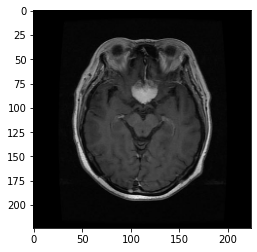

In [139]:
import matplotlib.pyplot as plt
plt.imshow(X224_test[0])

In [83]:
label[0:10]

array([1, 2, 1, 0, 1, 1, 2, 0, 0, 3], dtype=int32)

In [84]:
labelt[0:10]

array([1, 1, 0, 3, 0, 3, 3, 3, 3, 0], dtype=int32)

In [122]:
y224_train[0:9]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [123]:
y224_test[0:9]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [37]:
base_model = ap.VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))
base_model.trainable = False

head_model = base_model.output
head_model = keras.layers.Flatten()(head_model)
head_model = keras.layers.Dense(4,activation='softmax')(head_model)

model = keras.Model(base_model.input,head_model)

In [144]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/weights/vgg_m2_weights.h5')

In [145]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()])

In [146]:
model.evaluate(X224_test,y224_test)

7/7 [==============================] - 1s 59ms/step - loss: 0.2693 - precision_8: 0.9137 - recall_8: 0.9000 - accuracy: 0.0000e+00


[0.2693226635456085, 0.913705587387085, 0.8999999761581421, 0.0]

MODELs saved when checkpoint triggered.

In [152]:
test = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/checkpoint/vgg2')

In [153]:
test.evaluate(X224_test,y224_test)

7/7 [==============================] - 1s 60ms/step - loss: 0.2096 - accuracy: 0.9350


[0.20955617725849152, 0.9350000023841858]

In [154]:
test.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()])

In [155]:
test.evaluate(X224_test,y224_test)

7/7 [==============================] - 1s 60ms/step - loss: 0.2096 - precision_10: 0.9397 - recall_10: 0.9350 - accuracy: 0.0000e+00


[0.20955617725849152, 0.9396985173225403, 0.9350000023841858, 0.0]

In [149]:
test2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/checkpoint/resnet')

In [158]:
test2.evaluate(X512_test,y512_test)

7/7 [==============================] - 3s 252ms/step - loss: 6.1737 - accuracy: 0.9150


[6.173739433288574, 0.9150000214576721]

In [162]:
test2.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [163]:
test2.evaluate(X512_test,y512_test)

7/7 [==============================] - 2s 206ms/step - loss: 6.1737 - precision_12: 0.9150 - recall_12: 0.9150


[6.173739433288574, 0.9150000214576721, 0.9150000214576721]

In [164]:
test3 = ap.VGG16(weights=None,input_shape=(512,512,3),classes = 4)
test3.load_weights('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/weights/vgg_m0_weights.h5')
test3.compile(optimizer='AdaDelta', loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [165]:
test3.evaluate(X512_test,y512_test)

7/7 [==============================] - 15s 804ms/step - loss: 0.5158 - precision_13: 0.9050 - recall_13: 0.9050 - accuracy: 0.0063


[0.5158321857452393,
 0.9049999713897705,
 0.9049999713897705,
 0.0062500000931322575]

In [166]:
test3.compile(optimizer='AdaDelta', loss='categorical_crossentropy',metrics=['accuracy'])

In [167]:
test3.evaluate(X512_test,y512_test)

7/7 [==============================] - 2s 247ms/step - loss: 0.5158 - accuracy: 0.9050


[0.5158321857452393, 0.9049999713897705]

In [170]:
test4 = ap.ResNet50(weights=None,input_shape=(512,512,3),classes = 4)
test4.load_weights('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/weights/resnet_m0_weights.h5')
test4.compile(optimizer='AdaDelta', loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [171]:
test4.evaluate(X512_test,y512_test)

7/7 [==============================] - 3s 203ms/step - loss: 0.5351 - precision_14: 0.8359 - recall_14: 0.8150


[0.5351114869117737, 0.8358974456787109, 0.8149999976158142]

In [172]:
test4.compile(optimizer='AdaDelta', loss='categorical_crossentropy',metrics=['accuracy'])

In [174]:
test4.evaluate(X512_test,y512_test)

7/7 [==============================] - 3s 205ms/step - loss: 0.5351 - accuracy: 0.8250


[0.5351114869117737, 0.824999988079071]

In [175]:
#model

model_c =  keras.Sequential()
model_c.add(keras.layers.Conv2D(input_shape=(512,512,3),filters = 64, kernel_size = (3,3),padding = 'same',activation = 'relu'))
#model_c.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_c.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation = 'relu'))
#model_c.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_c.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'same',activation = 'relu'))
#model_c.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_c.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3),padding = 'same',activation = 'relu'))
#model_c.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

#model_c.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3),padding = 'same',activation = 'relu'))
#model_c.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3),padding = 'same',activation = 'relu'))
#model_c.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3),padding = 'same',activation = 'relu'))
model_c.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_c.add(keras.layers.Flatten())
model_c.add(keras.layers.Dense(units=1024,activation='relu'))
#model_c.add(keras.layers.Dense(units=4096,activation='relu'))
model_c.add(keras.layers.Dense(units=4,activation='softmax'))

In [176]:
model_c.compile(optimizer='AdaDelta', loss='categorical_crossentropy',metrics=['accuracy'])

In [178]:
test5 = model_c
test5.load_weights('/content/drive/MyDrive/Colab Notebooks/FINAL_DL/weights/c_weights.h5')

In [179]:
test5.evaluate(X512_test,y512_test)

7/7 [==============================] - 1s 117ms/step - loss: 0.3413 - accuracy: 0.9150


[0.3413435220718384, 0.9150000214576721]

In [180]:
test5.compile(optimizer='AdaDelta', loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [181]:
test5.evaluate(X512_test,y512_test)

7/7 [==============================] - 1s 118ms/step - loss: 0.3413 - precision_15: 0.9150 - recall_15: 0.9150


[0.3413435220718384, 0.9150000214576721, 0.9150000214576721]